## ML: Clustering

Clustering is one of the types of unsupervised learning. It is similar to classification: the aim is to give a label to each data point. However, unlike in classification, we are not given any examples of labels associated with the data points. We must infer from the data, which data points belong to the same cluster. This can be achieved using some notion of distance between the data points. Data points in the same cluster are somehow close to each other.

One of the simplest clustering methods is the *k-means clustering*. It aims at producing a clustering that is optimal in the following sense:

* the *centre of each cluster* is the average of all points in the cluster
* any point in a cluster is closer to its centre than to a centre of any other cluster

The k-means clustering is first given the wanted number of clusters, say k, as a *hyperparameter*. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

* any data point is set to belong to a cluster, whose centre is closest to it
* then for each cluster a new centre is chosen as the average of the data points in the cluster

This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

### Clustering digits

**Task 1:** Using scikit-learn download a set of 1797 images of handwritten digits with the correct labels 0,1,...,9. The images have quite a low resolution: 8*8=64 pixels. Let's see how our machine learning method works with this kind of data.

In [44]:
# Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import seaborn as sns


In [45]:

# Load the digits dataset
digits = load_digits()

#print the data to see images
print("Total number of images: ", digits.data.shape[0])
print("Number of pixels:", digits.data.shape[1])
print("Labels :", np.unique(digits.target))

Total number of images:  1797
Number of pixels: 64
Labels : [0 1 2 3 4 5 6 7 8 9]


**Task 2:** To get an idea how these data points look like,  plot first ten of these.

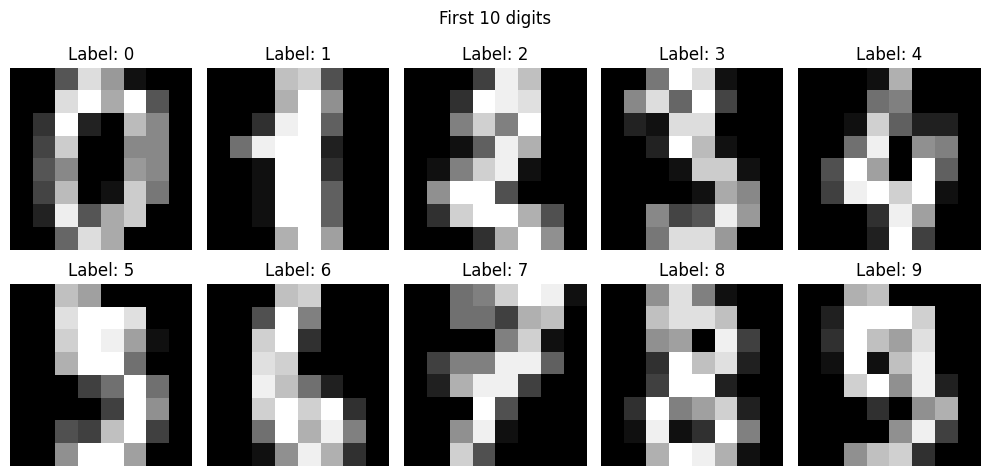

In [46]:
#plot the first 10 digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(digits.images[i], cmap='gray')
    axes[i].set_title(f"Label: {digits.target[i]}")
    axes[i].axis('off')

plt.suptitle("First 10 digits")
plt.tight_layout()
plt.show()


**Task 3:** Cluster these data points into ten clusters.

In [47]:
#create a K-means cluster with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42,n_init='auto')

# train the model
clusters = kmeans.fit_predict(digits.data)

# print the cluster assignments
print(f" Cluster labels shape: {clusters.shape}")
print(f" First 20 clusters: {clusters[:20]}")

 Cluster labels shape: (1797,)
 First 20 clusters: [5 7 7 6 4 9 2 0 8 9 5 7 3 6 4 1 2 0 8 9]


**Task 4:** Now, we have ten cluster centres, which are images with 8x8=64 pixels in them. Plot them to have a look at their appearence:

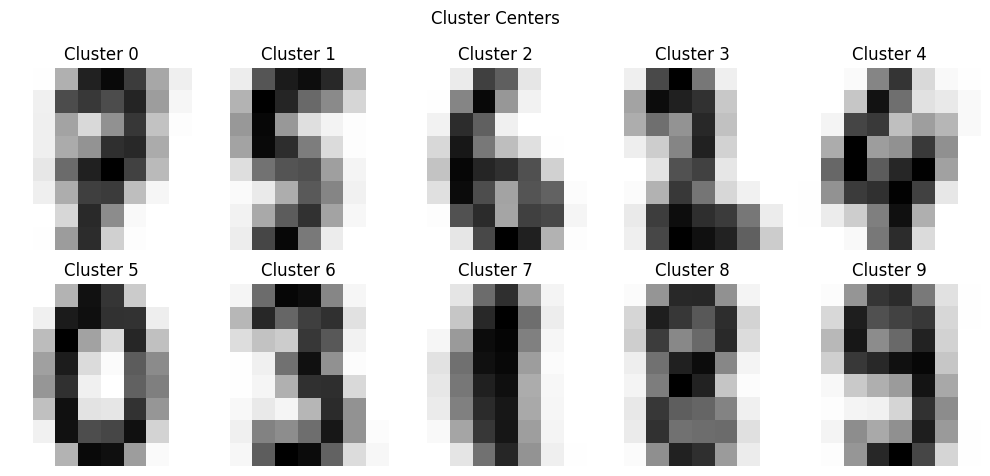

In [48]:
# Plot the 10 cluster centers
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(10):
    # Get the cluster center and reshape to 8x8
    center = kmeans.cluster_centers_[i].reshape(8, 8)

    # Display the cluster center
    axes[i].imshow(center, cmap='binary')
    axes[i].set_title(f"Cluster {i}")
    axes[i].axis('off')

plt.suptitle("Cluster Centers")
plt.tight_layout()

plt.show()

**Task 5:** Report the accuracy score and answer the following:
  

1.   What are your findings. Report your findings?
2.   How many numbers can be recognized?
3.   Are there any numbers which can't be recognized? If so, which ones?
4.   What is the accuracy score of this clustering?
5.   What do you sugegst to enhance the accuracy?





 Accuracy of clustering: 86.14%


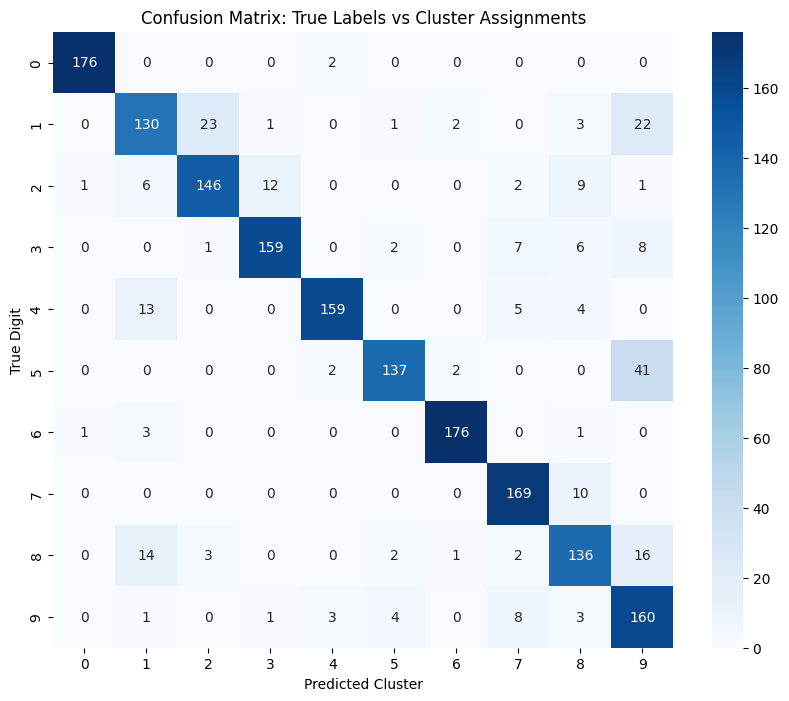

In [49]:


#find the most frequent true label
labels_match = np.zeros(len(digits.data), dtype =int)

for cluster_num in range(kmeans.n_clusters):
  #find which data points are in this cluster
  mask = (clusters == cluster_num)
  #find the most frequent label
  most_frequent_label = mode(digits.target[mask])[0]
  #assign the most frequent label to all data points in this cluster
  labels_match[mask] = most_frequent_label

#calculate the accuracy score
accuracy = accuracy_score(digits.target, labels_match)
print(f" Accuracy of clustering: {accuracy:.2%}")

#confusion matrix
confusion = confusion_matrix(digits.target, labels_match)
# Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Digit')
plt.title('Confusion Matrix: True Labels vs Cluster Assignments')
plt.show()

In [53]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(digits.target, labels_match, zero_division=0))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.82      0.95      0.88       182
           2       0.99      0.84      0.91       177
           3       0.92      0.86      0.89       183
           4       0.99      0.80      0.88       181
           5       0.97      0.76      0.85       182
           6       0.94      0.99      0.97       181
           7       0.86      0.99      0.92       179
           8       0.86      0.86      0.86       174
           9       0.71      0.89      0.79       180

    accuracy                           0.89      1797
   macro avg       0.90      0.89      0.89      1797
weighted avg       0.90      0.89      0.89      1797



**1. What are your findings. Report your findings**?

  Overall performance with K-Means algorithm is good since it achieved 86.14% accuraccy. Digits like '0','6','7' were clustered with majority of images correctly grouped together. Digit '1' is confused with '2' and '9' and Digit '5' is confused with '9' the most.

**2. How many numbers can be recognized?**

Almost all 10 digits are recognized by the model and cluster correctly , only some of them were mixed with others.

**3. Are there any numbers which can't be recognized? If so, which ones?**

Yes, some digits show the confusion with other digits.
Digit '1' is confused with '2', '9' and '4' as handwriting varies and can look similar to parts of other digits. Other digits like '5' has seen a significant misclassification with '9' (41 images were incorrectly labeled as 9) and '8' also misclassified with '1' and '9' mostly as the curve pattern of 8 similar to 9 and fully closed loop mistook with 1 in 8*8 pixel image.


**4.  What is the accuracy score of this clustering?**

The accuracy score of this clustering is 86.14%.

**5. What do you sugegst to enhance the accuracy?**
- Algorithm adjustments: increase the number of clusters or try different initialization methods  of the K-Means algorithm
- Apply feature engineering such as normalizing the features or dimensionality reduction (PCA) to the data before using K-Means
- Apply different algorithm, Gaussian Mixture Model(GMM) which is a soft clustering method or DBSCAN (density- based clustering) and so on.
- Try with supervised learning model such as SVM, Random Forest and KNN classification models as they are simple and easy to understand if get a high accuracy.


In [50]:
#try with 20 clusters
kmeans = KMeans(n_clusters=20, random_state=42,n_init='auto')

# train the model
clusters = kmeans.fit_predict(digits.data)

#find the most frequent true label
labels_match = np.zeros(len(digits.data), dtype =int)

for cluster_num in range(kmeans.n_clusters):
  #find which data points in this cluster
  mask = (clusters == cluster_num)
  #find the most frequent label
  most_frequent_label = mode(digits.target[mask])[0]
  #assign the most frequent label to all data points in this cluster
  labels_match[mask] = most_frequent_label

#calculate the accuracy score
accuracy = accuracy_score(digits.target, labels_match)
print(f" Accuracy of clustering: {accuracy:.2%}")

 Accuracy of clustering: 89.15%


The above method tried with increasing the K_Means clusters and the accuracy score is increased after training with more clusters.

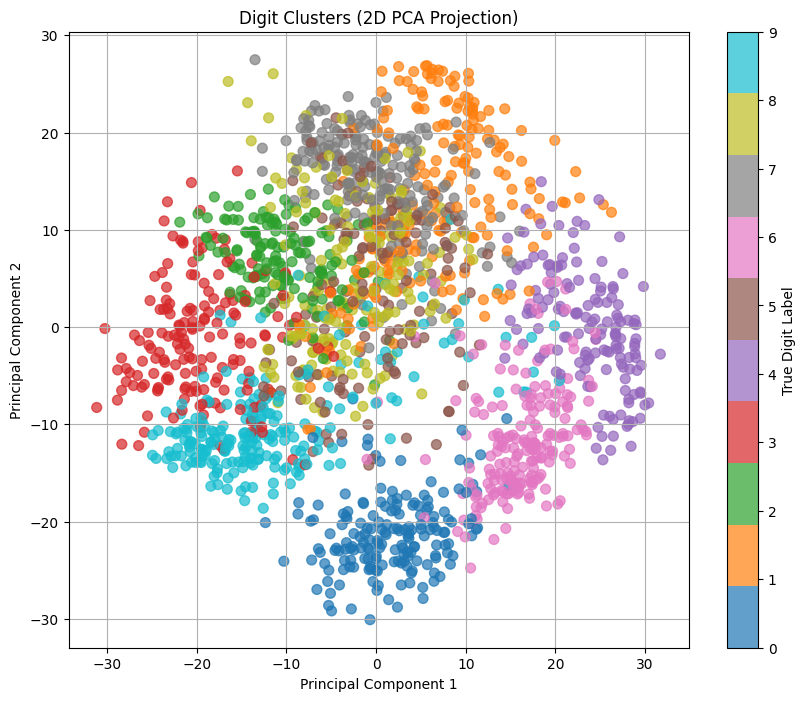

In [58]:
# Visualize clusters
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(digits.data)

# Plot the data points, colored by the matched true digit label
plt.figure(figsize=(10, 8))
# Use labels_match for coloring and specify a colormap with enough distinct colors (e.g., 'tab10')
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_match, cmap='tab10', s=50, alpha=0.7)
plt.title("Digit Clusters (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Create a color bar and set the ticks to represent the digits 0-9
cbar = plt.colorbar(scatter, label='True Digit Label')
cbar.set_ticks(range(10)) # Set ticks at integer values from 0 to 9
cbar.set_ticklabels(range(10)) # Label ticks with the digits 0 to 9

plt.grid(True)
plt.show()

As in the plot, we can see that digits '1','5' and '8' are mixed compared to other digits' clusters.

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/clustering.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
